<a href="https://colab.research.google.com/github/bhanuteja2001/TwitterSentiment/blob/main/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
Train = pd.read_csv('/content/drive/MyDrive/Twitter Sentiment/train_E6oV3lV.csv')
Train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
Test = pd.read_csv('/content/drive/MyDrive/Twitter Sentiment/test_tweets_anuFYb8.csv')
Test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [77]:
Test.shape

(17197, 2)

In [79]:
Test.drop('id', inplace=True, axis=1)

In [9]:
X = Train.drop('label',axis=1)
y = Train['label']

In [11]:
X.shape

(31962, 2)

In [12]:
X.tail()

,id,tweet
31957,31958,ate @user isz that youuu?ðððððð...
31958,31959,to see nina turner on the airwaves trying to...
31959,31960,listening to sad songs on a monday morning otw...
31960,31961,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,thank you @user for you follow


In [20]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(X)):
  review = re.sub('[^a-zA-Z]', ' ', X['tweet'][i])
  review = review.lower()
  review = review.split()
    
  review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [82]:
corpus_test = []
for i in range(0, len(Test)):
  review = re.sub('[^a-zA-Z]', ' ', Test['tweet'][i])
  review = review.lower()
  review = review.split()
    
  review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus_test.append(review)

In [27]:
pd.DataFrame(corpus)

,0
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [44]:
from gensim.models import Word2Vec

words = [nltk.word_tokenize(sentence) for sentence in corpus]

print(words)
model = Word2Vec(words)
words = model.wv.vocab

[['user', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run'], ['user', 'user', 'thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked'], ['bihday', 'majesty'], ['model', 'love', 'u', 'take', 'u', 'time', 'ur'], ['factsguide', 'society', 'motivation'], ['huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'dispute', 'get', 'allshowandnogo'], ['user', 'camping', 'tomorrow', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'danny'], ['next', 'school', 'year', 'year', 'exam', 'think', 'school', 'exam', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl'], ['love', 'land', 'allin', 'cavs', 'champion', 'cleveland', 'clevelandcavaliers'], ['user', 'user', 'welcome', 'gr'], ['ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex'], ['selfish', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [61]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,aap,ab,able,abrahamhicks,abrahamhicks lawofattraction,abrahamhicks lawofattraction healthy,absolute,absolutely,abt,abuse,accept,acceptable,accepted,accepted user,accepted user amp,access,accessory,accident,according,account,ace,achieve,acne,acne altwaystoheal,acne altwaystoheal healthy,across,act,acting,action,active,activity,actor,actress,actual,actually,ad,adam,adapt,adapt environment,adapt environment need,...,ya,yall,yay,yea,yeah,yeah good,yeah good bing,year,year ago,year internalize,year internalize female,year later,year old,yelchin,yellow,yep,yes,yes yes,yesterday,yet,yet another,yo,yoga,yolo,york,young,youth,youtube,youtuber,yoy,yr,yr old,yum,yummy,yup,yyc,zelda,zen,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.952
Confusion matrix, without normalization


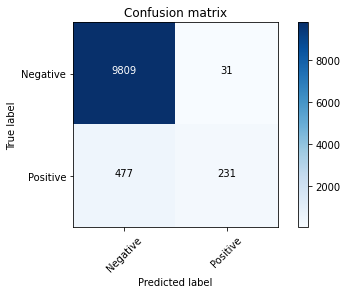

In [64]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

In [66]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9518392112248768

accuracy:   0.945
Confusion matrix, without normalization


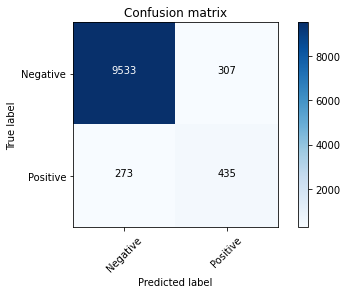

In [68]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

In [69]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9575274933636708
Alpha: 0.1, Score : 0.9593287827076223
Alpha: 0.2, Score : 0.9591391733029958
Alpha: 0.30000000000000004, Score : 0.9579067121729238
Alpha: 0.4, Score : 0.9573378839590444
Alpha: 0.5, Score : 0.9560106181266591
Alpha: 0.6000000000000001, Score : 0.9551573758058399
Alpha: 0.7000000000000001, Score : 0.9545885475919605
Alpha: 0.8, Score : 0.9540197193780812
Alpha: 0.9, Score : 0.9529768676526356


In [71]:
feature_names = tfidf_v.get_feature_names()

In [73]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.0802406589635725, 'user'),
 (-5.016909253591076, 'user user'),
 (-5.395246213459938, 'trump'),
 (-5.40596036471247, 'amp'),
 (-5.46490646164262, 'white'),
 (-5.7079331047240185, 'libtard'),
 (-5.7142582664644195, 'woman'),
 (-5.741687843493985, 'black'),
 (-5.800732760163592, 'user user user'),
 (-5.808628464685009, 'racist'),
 (-5.9990076134061345, 'allahsoil'),
 (-6.0029279776339575, 'like'),
 (-6.069693411725581, 'user allahsoil'),
 (-6.175526262647823, 'racism'),
 (-6.17722128050147, 'liberal'),
 (-6.205497794693526, 'hate'),
 (-6.22912035461094, 'politics'),
 (-6.3258695637736135, 'people'),
 (-6.3511337903146785, 'comment'),
 (-6.374353259637344, 'sjw')]

In [74]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-9.151448450264764, 'aap'),
 (-9.151448450264764, 'ab'),
 (-9.151448450264764, 'able'),
 (-9.151448450264764, 'abrahamhicks'),
 (-9.151448450264764, 'abrahamhicks lawofattraction'),
 (-9.151448450264764, 'abrahamhicks lawofattraction healthy'),
 (-9.151448450264764, 'absolute'),
 (-9.151448450264764, 'accepted'),
 (-9.151448450264764, 'accepted user'),
 (-9.151448450264764, 'accepted user amp'),
 (-9.151448450264764, 'accessory'),
 (-9.151448450264764, 'ace'),
 (-9.151448450264764, 'achieve'),
 (-9.151448450264764, 'acne'),
 (-9.151448450264764, 'acne altwaystoheal'),
 (-9.151448450264764, 'acne altwaystoheal healthy'),
 (-9.151448450264764, 'across'),
 (-9.151448450264764, 'active'),
 (-9.151448450264764, 'activity'),
 (-9.151448450264764, 'actress'),
 (-9.151448450264764, 'actual'),
 (-9.151448450264764, 'adapt'),
 (-9.151448450264764, 'adapt environment'),
 (-9.151448450264764, 'adapt environment need'),
 (-9.151448450264764, 'adele'),
 (-9.151448450264764, 'admit'),
 (-9.15144845

In [90]:
print(len(corpus_test))
print(Test.shape)

17197
(17197, 1)


In [91]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
test_1=tfidf_v.fit_transform(corpus_test).toarray()

In [92]:
test_1.shape

(17197, 5000)

In [94]:
prediction_test = classifier.predict(test_1)

In [96]:
pd.DataFrame(prediction_test).value_counts()

0    16705
1      492
dtype: int64

In [98]:
submit = pd.read_csv('/content/drive/MyDrive/Twitter Sentiment/sample_submission_gfvA5FD.csv')

In [99]:
submit.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [104]:
submit.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [103]:
submit['label'] = prediction_test

In [105]:
from google.colab import files
#res = pd.DataFrame(L) 
#res.columns = ["prediction"]
submit.to_csv('prediction_results.csv',index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>